## 

# Capítulo 9: Redes Neuronales Convolucionales

## CNN para clasificar digitos manuscritos

In [42]:
# importamos las librerias necesarias
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [43]:
# Cargar el conjunto de datos MNIST
(X_ent, y_ent), (X_pru, y_pru) = mnist.load_data()

In [44]:
X_ent.shape

(60000, 28, 28)

In [45]:
# Preprocesamiento de datos
X_ent = X_ent.reshape((60000, 28, 28, 1)).astype('float32') / 255
X_pru = X_pru.reshape((10000, 28, 28, 1)).astype('float32') / 255

y_ent = to_categorical(y_ent)
y_pru = to_categorical(y_pru)

In [47]:
# Construir la arquitectura de la CNN
modelo = Sequential()
modelo.add(Input(shape=(28,28,1)))
modelo.add(Conv2D(32, (5, 5), activation='relu'))
modelo.add(MaxPooling2D((3, 3)))
modelo.add(Conv2D(64, (5, 5), activation='relu'))
modelo.add(MaxPooling2D((3, 3)))
modelo.add(Flatten())
modelo.add(Dense(10, activation='softmax'))
modelo.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,746 (206.04 KB)

 Trainable params: 52,746 (206.04 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Compilar el modelo
modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
X_ent.shape

(60000, 28, 28, 1)

In [50]:
# Entrenar el modelo
modelo.fit(X_ent, y_ent, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8260 - loss: 0.6080 - val_accuracy: 0.9788 - val_loss: 0.0805
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9762 - loss: 0.0805 - val_accuracy: 0.9811 - val_loss: 0.0665
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9841 - loss: 0.0504 - val_accuracy: 0.9799 - val_loss: 0.0729
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9878 - loss: 0.0406 - val_accuracy: 0.9860 - val_loss: 0.0478
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9901 - loss: 0.0330 - val_accuracy: 0.9849 - val_loss: 0.0525


In [51]:
# Evaluar el modelo en el conjunto de prueba
perd_pru, prec_pru = modelo.evaluate(X_pru, y_pru)
print(f'Precisión en el conjunto de prueba: {prec_pru * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9807 - loss: 0.0624
Precisión en el conjunto de prueba: 98.50%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


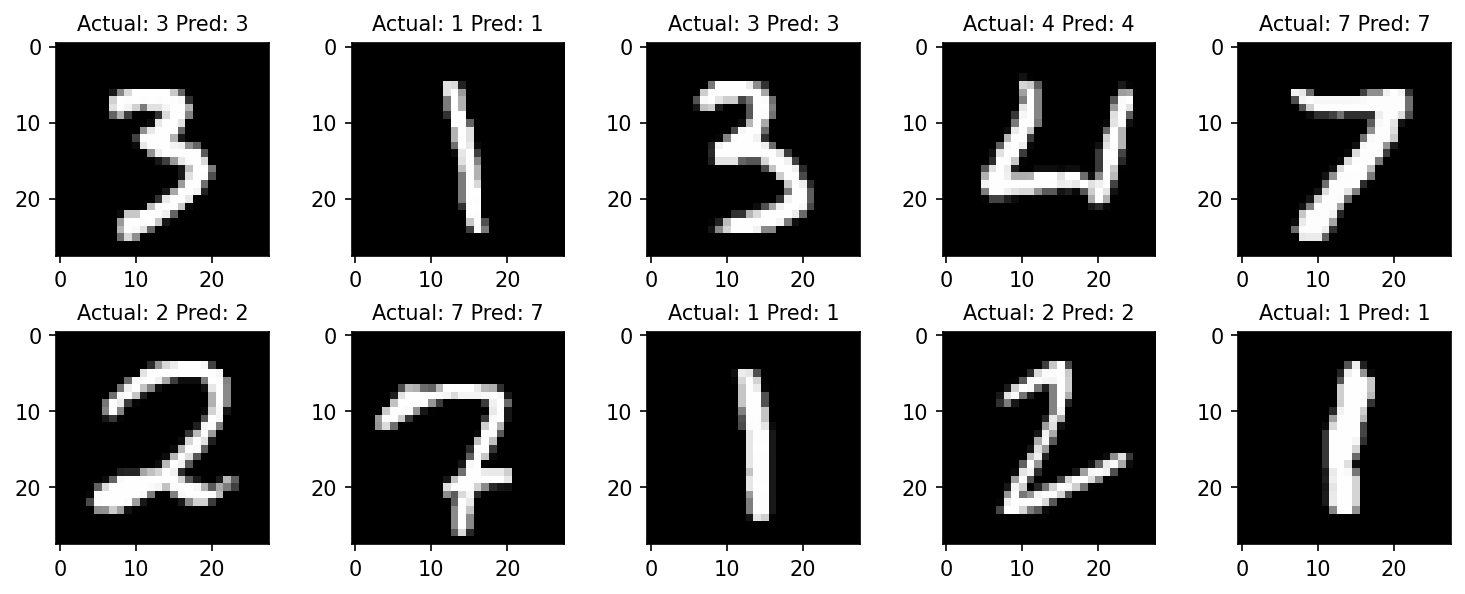

In [52]:
import numpy as np
actuales = np.argmax(y_pru[30:40], axis=1)
preds = modelo.predict(X_pru[30:40])
etiquetas = np.argmax(preds,axis=1)
plt.rcParams['figure.dpi'] = 150
imagenes = np.squeeze(X_pru[30:40])
num_muestras = 10  
plt.figure(figsize=(10, 4))

for i in range(num_muestras):
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.reshape(imagenes[i], [28,28]), cmap='Greys_r')         
    plt.title('Actual: ' + str(actuales[i]) + ' Pred: ' + str(etiquetas[i]),
                               fontsize=10)    

plt.tight_layout()
plt.show()

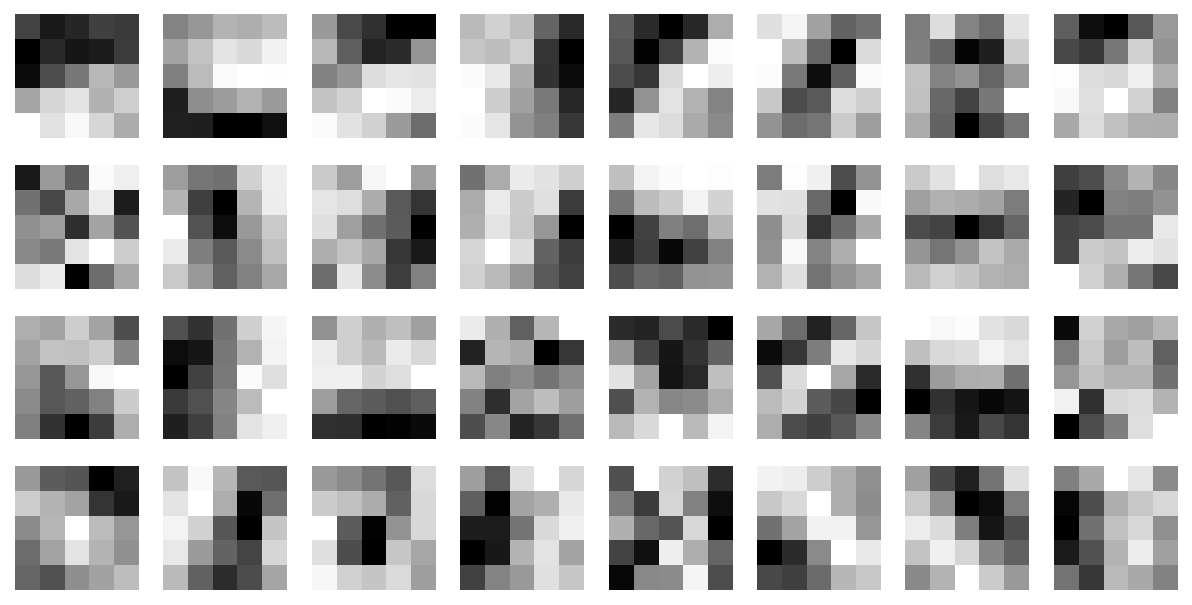

In [53]:
import matplotlib.pyplot as plt
# Obtener los pesos de la primera capa (filtros)
pesos_primera_capa = modelo.layers[0].get_weights()[0]

# Visualizar los filtros de la primera capa
plt.figure(figsize=(10, 5))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(pesos_primera_capa[:, :, 0, i], cmap='gray')
    plt.axis('off')

plt.show()

### CNN para clasificar imágenes del dataset CIFAR-10

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.utils import to_categorical

In [55]:
# Obtenemos los datos, los separamos en conjunto de entrenamiento y prueba:
(X_ent, y_ent), (X_pru, y_pru) = cifar10.load_data()
X_ent = X_ent.astype('float32') / 255.
X_pru = X_pru.astype('float32') / 255.

y_ent = to_categorical(y_ent, 10)
y_pru = to_categorical(y_pru, 10)
print('Forma X_ent:', X_ent.shape)
print('Forma X_pru:', X_pru.shape)

Forma X_ent: (50000, 32, 32, 3)
Forma X_pru: (10000, 32, 32, 3)


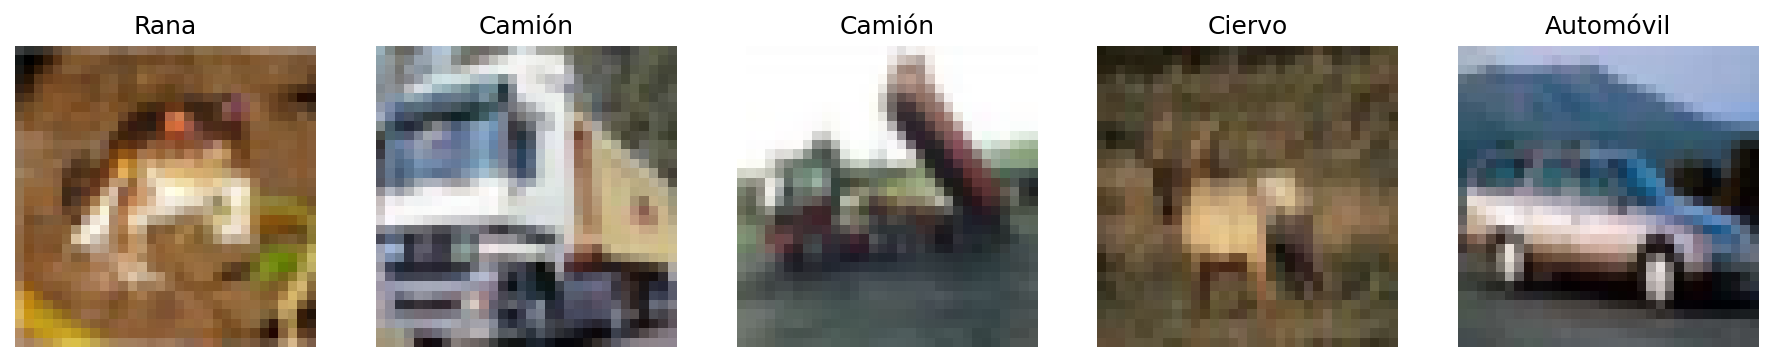

In [56]:
nombre_etiquetas = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_ent[i])
    plt.axis('off')
    plt.title(f'{nombre_etiquetas[np.argmax(y_ent[i])]}')
plt.show()

In [57]:
# Creamos el modelo de red neuronal convolucional (CNN)
modelo = Sequential()
modelo.add(Input(shape=(32,32,3)))
modelo.add(Conv2D(32, (3, 3), activation='relu'))
modelo.add(BatchNormalization()),
modelo.add(Dropout(0.2)),
modelo.add(MaxPooling2D((3, 3)))
modelo.add(Conv2D(64, (3, 3), activation='relu'))
modelo.add(BatchNormalization()),
modelo.add(Dropout(0.3)),
modelo.add(MaxPooling2D((3, 3)))
modelo.add(Flatten())
modelo.add(Dense(64, activation='relu'))
modelo.add(Dense(10, activation='softmax'))
modelo.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,874 (144.04 KB)

 Trainable params: 36,682 (143.29 KB)

 Non-trainable params: 192 (768.00 B)

In [58]:
# Compilar el modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Entrenar la red neuronal convolucional
modelo.fit(X_ent, y_ent, epochs=5, batch_size=64, validation_data=(X_pru, y_pru))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 64ms/step - accuracy: 0.3507 - loss: 1.8771 - val_accuracy: 0.4239 - val_loss: 1.6646
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.5586 - loss: 1.2590 - val_accuracy: 0.5436 - val_loss: 1.3553
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.6045 - loss: 1.1252 - val_accuracy: 0.5223 - val_loss: 1.4094
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.6345 - loss: 1.0513 - val_accuracy: 0.5411 - val_loss: 1.3521
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.6537 - loss: 0.9890 - val_accuracy: 0.5906 - val_loss: 1.1844


In [59]:
# Evaluar el modelo en el conjunto de prueba
perdida, exactitud = modelo.evaluate(X_pru, y_pru)
print(f'Exactitud en el conjunto de prueba: {exactitud * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5972 - loss: 1.1823
Exactitud en el conjunto de prueba: 59.06%


#### Con aumento de datos

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configurar la aumentación de datos
gen_datos = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [62]:
# Ajustar el generador de datos al conjunto de entrenamiento
gen_datos.fit(X_ent)

# Entrenar el modelo con aumentación de datos
modelo.fit(gen_datos.flow(X_ent, y_ent, batch_size=64),
          epochs=5,
          validation_data=(X_pru, y_pru))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 119ms/step - accuracy: 0.4584 - loss: 1.5267 - val_accuracy: 0.5767 - val_loss: 1.2557
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 131ms/step - accuracy: 0.4913 - loss: 1.4391 - val_accuracy: 0.4174 - val_loss: 1.9262
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 106s 135ms/step - accuracy: 0.5027 - loss: 1.4019 - val_accuracy: 0.5306 - val_loss: 1.3820
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 134ms/step - accuracy: 0.5148 - loss: 1.3790 - val_accuracy: 0.5913 - val_loss: 1.2106
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 125ms/step - accuracy: 0.5207 - loss: 1.3555 - val_accuracy: 0.6032 - val_loss: 1.1702


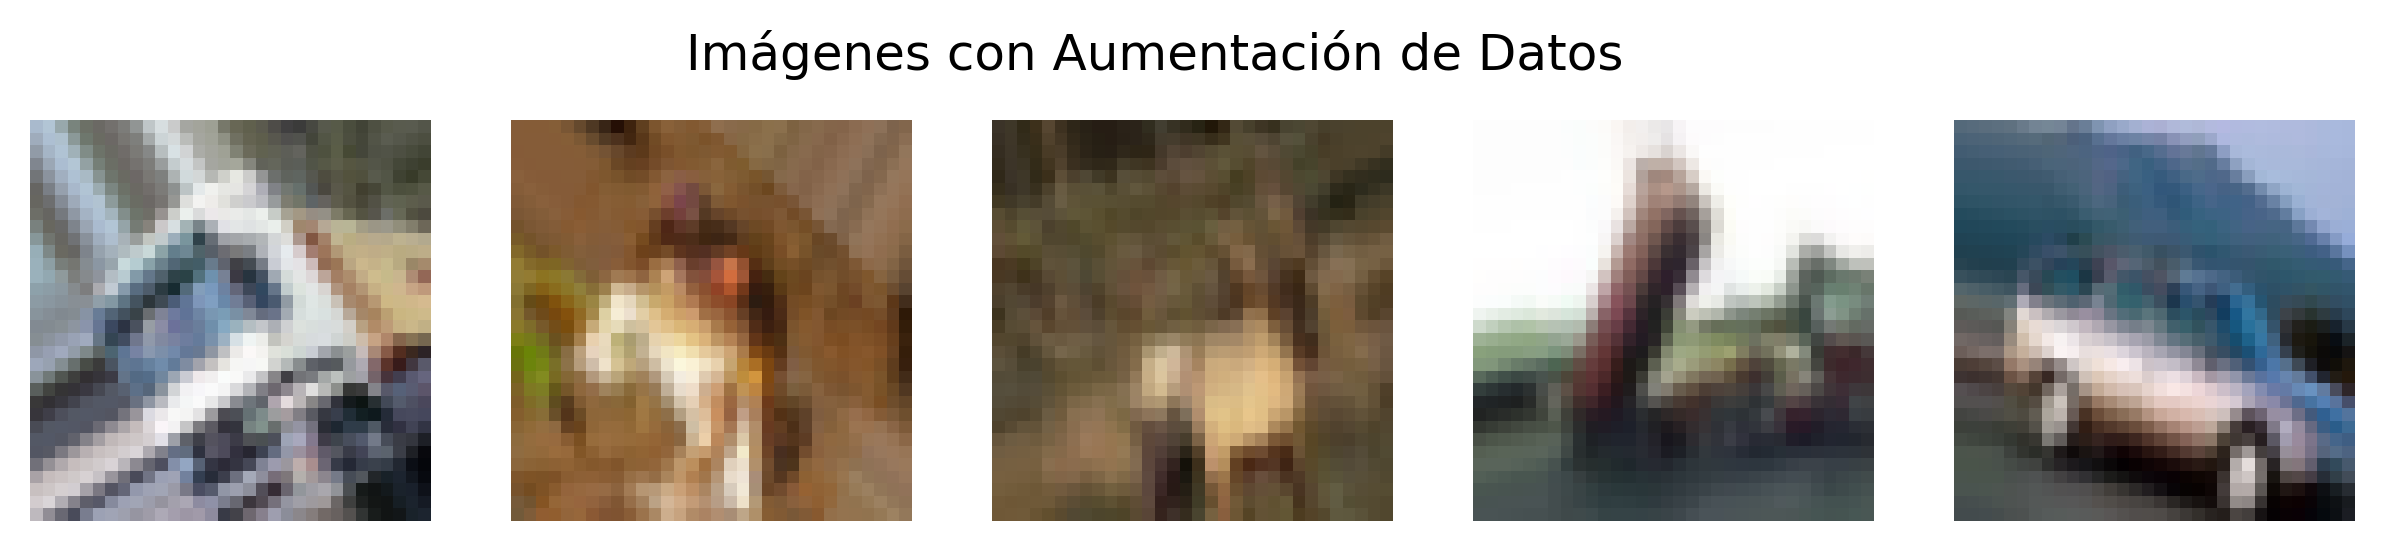

In [32]:
# Visualizar algunas imágenes generadas mediante aumentación de datos
imgs_aumentadas = gen_datos.flow(X_ent[:5], batch_size=1)

plt.figure(figsize=(10, 2))
for i in range(5):
    imagen = next(imgs_aumentadas)[0]
    plt.subplot(1, 5, i+1)
    plt.imshow(imagen)
    plt.axis('off')
plt.suptitle('Imágenes con Aumentación de Datos')
plt.show()

In [34]:
# Evaluar el modelo en el conjunto de prueba
perdida, exactitud = modelo.evaluate(X_pru, y_pru)
print(f'Exactitud en el conjunto de prueba: {exactitud * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5355 - loss: 1.2776
Exactitud en el conjunto de prueba: 53.52%


In [36]:
# Evaluar el modelo en el conjunto de entrenamiento
perdida, exactitud = modelo.evaluate(X_ent, y_ent)
print(f'Exactitud en el conjunto de entrenamiento: {exactitud * 100:.2f}%')

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5546 - loss: 1.2384
Exactitud en el conjunto de entrenamiento: 55.17%
